
## Домашнее задание 1. Введение в PyTorch. Полносвязные нейронные сети.




In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import random
device = "cuda" if torch.cuda.is_available() else "cpu"
from tqdm.notebook import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
df = pd.read_csv('data.txt.zip', header=None)

--2023-10-15 18:27:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.txt.zip’

data.txt.zip            [               <=>  ] 201.24M  21.3MB/s    in 11s     

2023-10-15 18:27:49 (18.6 MB/s) - ‘data.txt.zip’ saved [211011981]



In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = 463715

X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

y_true = y_test
X_true = X_test

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

X_scaler = StandardScaler()
y_scaler = StandardScaler()

# X_scaler = MinMaxScaler()
# y_scaler = MinMaxScaler()

# X_scaler = RobustScaler()
# y_scaler = RobustScaler()

X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))

X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test.reshape(-1, 1))

X_train = pd.DataFrame(data=X_train)
X_test = pd.DataFrame(data=X_test)

X_true_scaled = X_test

# Тупил из-за reshape(1, -1) вместо reshape(-1, 1)

(array([   27.,    49.,    55.,   264.,   916.,  1803.,  2796.,  5659.,
        13249., 26812.]),
 array([1927. , 1935.3, 1943.6, 1951.9, 1960.2, 1968.5, 1976.8, 1985.1,
        1993.4, 2001.7, 2010. ]),
 <BarContainer object of 10 artists>)

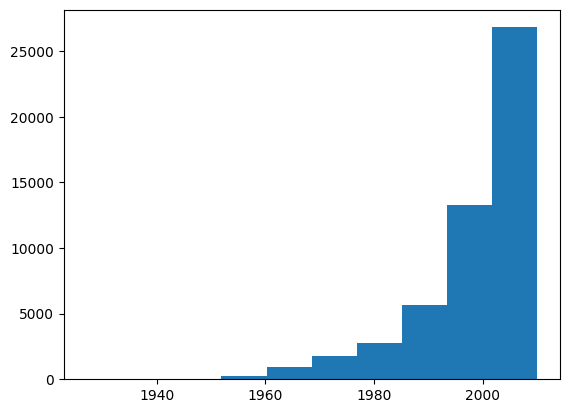

In [ ]:
plt.hist(y_true)

(array([   27.,    49.,    55.,   264.,   916.,  1803.,  2796.,  5659.,
        13249., 26812.]),
 array([-6.52538324, -5.76668253, -5.00798182, -4.24928111, -3.4905804 ,
        -2.73187969, -1.97317898, -1.21447827, -0.45577756,  0.30292315,
         1.06162386]),
 <BarContainer object of 10 artists>)

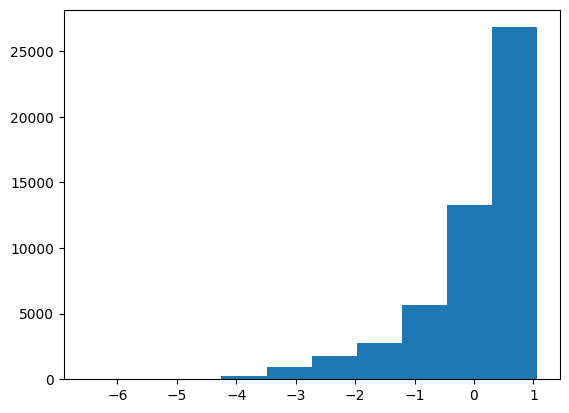

In [ ]:
plt.hist(y_test)

(array([   27.,    49.,    55.,   264.,   916.,  1803.,  2796.,  5659.,
        13249., 26812.]),
 array([1927. , 1935.3, 1943.6, 1951.9, 1960.2, 1968.5, 1976.8, 1985.1,
        1993.4, 2001.7, 2010. ]),
 <BarContainer object of 10 artists>)

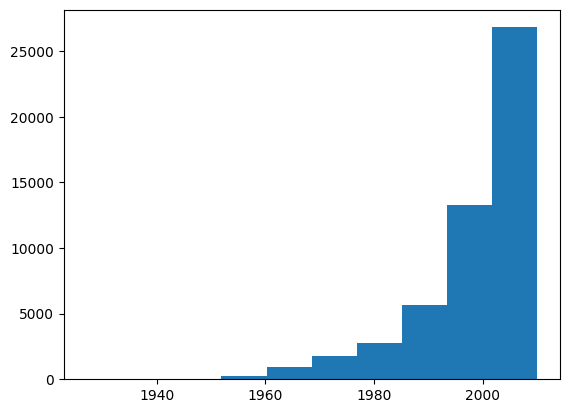

In [ ]:
plt.hist(y_scaler.inverse_transform(y_test))

## Задание 0. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)


In [ ]:
import random
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    random.seed(seed)
set_random_seed(42)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model_rr = Ridge(alpha = 1).fit(X_train, y_train)
rr_rmse_inv = mean_squared_error(y_scaler.inverse_transform(model_rr.predict(X_test)), y_scaler.inverse_transform(y_test), squared = False)
rr_rmse = mean_squared_error(model_rr.predict(X_test), y_test, squared = False)
print(rr_rmse_inv)
print(rr_rmse)

9.510160820470436
0.8693211767066854


(array([1.0000e+00, 9.0000e+00, 1.4100e+02, 3.9580e+03, 2.4322e+04,
        2.2348e+04, 7.9700e+02, 4.8000e+01, 5.0000e+00, 1.0000e+00]),
 array([1953.85448429, 1963.02357756, 1972.19267084, 1981.36176412,
        1990.5308574 , 1999.69995067, 2008.86904395, 2018.03813723,
        2027.20723051, 2036.37632378, 2045.54541706]),
 <BarContainer object of 10 artists>)

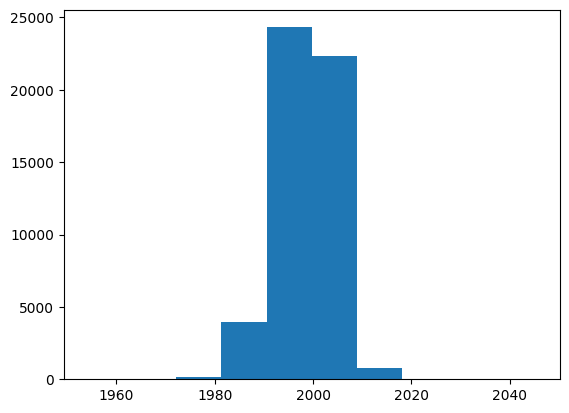

In [ ]:
plt.hist(y_scaler.inverse_transform(model_rr.predict(X_test)))

Лучшая константа для RMSE это среднее, посчитаем значение метрики при нем

In [ ]:
best_rmse_metric = mean_squared_error(np.full(len(y_true), y_true.mean()), y_true, squared = False)
best_rmse_metric

10.851909820717683

## Задание 1. (максимум 10 баллов)



Закрепите свои знания о том, как pytorch работает с обратным распространением ошибки, проделав следующие шаги:

1. Создайте модель линейной регрессии, которая будет состоять только из одного Linear слоя.
2. Напишите цикл обучения вашей линейной регрессии. В нем реализуйте подсчет функции потерь, сделайте шаг градиентного спуска. Запрещено использовать готовые оптимизаторы и loss-функции из библиотеки pytorch. Для подсчета градиента воспользуйтесь методом backward.
3. Запустите обучение на 10 эпохах, после каждой проверяйте значение целевой метрики на тестовой выборке.
4. Выведите на экран графики метрики и значения функции потерь на тестовой и обучающей выборке.

В данном задании нет цели побить какой-то порог по метрике. Ваша задача - убедиться в том, что ваш рукописный цикл обучения работает. Для ускорения вычислений и обучения модели можете брать только срез данных, а не весь датасет.

In [ ]:
# Спасибо автору книги "Гроккаем глубокое обучение", пока я делал это задание -
# я наконец-то понял смысл матричного произведения в строке
# w = w + a * 2 * delta.dot(X)

In [ ]:
input = 90
weights = np.random.rand(input)*0.02 - 0.01

In [ ]:
a = 0.002
n_epochs = 10

train_loss = 1694979.2035101699
val_loss = 917991.6294075164
train_loss = 191641749.21944666
val_loss = 42729154.01525976
train_loss = 74059583.13820036
val_loss = 17769819.859416958
train_loss = 13060556.109364312
val_loss = 8714806.939702937
train_loss = 4716972.492851599
val_loss = 3528775.4943090687
train_loss = 2266429.064287132
val_loss = 2036392.9104698324
train_loss = 1409536.706829103
val_loss = 1420975.6830971974
train_loss = 998214.8557706998
val_loss = 1088756.1756935033
train_loss = 766057.7156422994
val_loss = 883547.5410234161
train_loss = 620126.7096893297
val_loss = 745306.3841774991



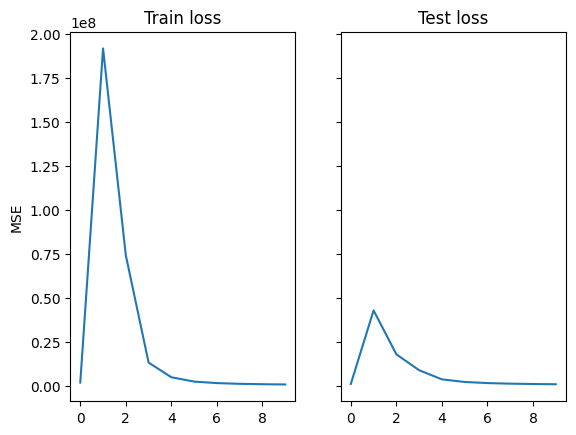

In [ ]:
t_losses = []
test_losses = []
for epoch in range(n_epochs):
    train_loss = np.array([])
    val_loss = np.array([])
    a = 0.002/(epoch+1)
    for i in range(50):
        y_pred = X_train[i * 10:(i+1) * 10].dot(weights)
        delta = y_train[:, 0][i * 10:(i+1) * 10] - y_pred
        weights = weights + a * 2 * delta.dot(X_train[i * 10:(i+1) * 10])

        train_loss = np.append(train_loss, (y_train[:, 0][i * 10:(i+1) * 10] - y_pred)**2)
        val_loss = np.append(val_loss, (y_test[:, 0][i * 10:(i+1) * 10] - X_test[i * 10:(i+1) * 10].dot(weights))**2)

    print(f'train_loss = {train_loss.mean()}')
    print(f'val_loss = {val_loss.mean()}')
    t_losses.append(train_loss.mean())
    test_losses.append(val_loss.mean())

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(range(n_epochs), t_losses)
ax1.set_title('Train loss')
ax2.plot(range(n_epochs), test_losses)
ax2.set_title('Test loss')
ax1.set_ylabel('MSE')
plt.show
print('')


## Задание 1 (другая логика)


1. Создайте модель линейной регрессии, которая будет состоять только из одного Linear слоя.
2. Напишите цикл обучения вашей линейной регрессии. В нем реализуйте подсчет функции потерь, сделайте шаг градиентного спуска. Запрещено использовать готовые оптимизаторы и loss-функции из библиотеки pytorch. Для подсчета градиента воспользуйтесь методом backward.
3. Запустите обучение на 10 эпохах, после каждой проверяйте значение целевой метрики на тестовой выборке.
4. Выведите на экран графики метрики и значения функции потерь на тестовой и обучающей выборке.

In [ ]:
X_train  = torch.tensor(X_train.values)
y_train = torch.tensor(y_train)

X_train = X_train.to(torch.float32)
y_train = y_train.to(torch.float32)


X_test  = torch.tensor(X_test.values)
y_test = torch.tensor(y_test)

X_test = X_test.to(torch.float32)
y_test = y_test.to(torch.float32)

Epoch: 1, loss: 1.9924345016479492
Epoch: 2, loss: 0.059801697731018066
Epoch: 3, loss: 0.2888023257255554
Epoch: 4, loss: 0.3791879415512085
Epoch: 5, loss: 0.3518102169036865
Epoch: 6, loss: 0.27264195680618286
Epoch: 7, loss: 0.1779041886329651
Epoch: 8, loss: 0.08898371458053589
Epoch: 9, loss: 0.013806819915771484
Epoch: 10, loss: 0.04608428478240967



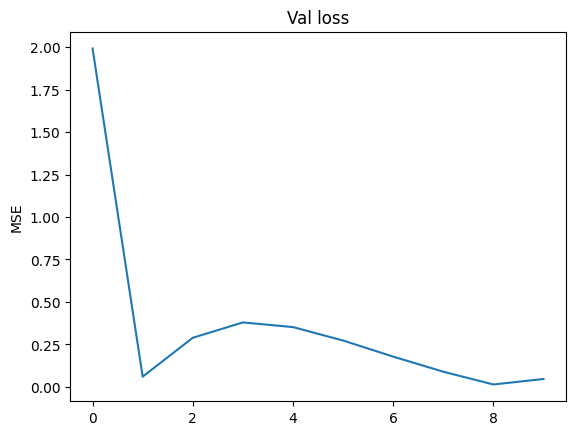

In [ ]:
n_epochs = 10



t = []


weights = torch.rand(90, requires_grad=True)
bias = torch.rand(1, requires_grad=True)




for epoch in range(n_epochs):
    a = 0.002
    for i in range(500):

        test_losses = []

        y_pred = torch.t(torch.matmul(X_train[i], weights)) + bias
        # loss = (y_train[i * 10:(i+1) * 10] - y_pred)**2
        loss = (y_train[i] - y_pred)**2

        loss.retain_grad()
        loss.backward()


        bias.retain_grad()
        weights.retain_grad()

        bias_grad = bias.grad.detach()
        weights_grad = weights.grad.detach()


        bias.data -= a * bias_grad
        weights.data -= a * weights_grad

        bias.grad.zero_()
        weights.grad.zero_()


        rmseee = np.sqrt(((y_test[i] - (torch.t(torch.matmul(X_test[i], weights)).detach().numpy()) - bias.detach().numpy())**2).mean())


        test_losses.append(rmseee)

    # печатаем лосс
    test_losses = np.array(test_losses)
    print(f"Epoch: {epoch + 1}, loss: {test_losses.mean()}")
    t.append(test_losses)

plt.plot(range(n_epochs), t)
plt.title('Val loss')
plt.ylabel('MSE')
plt.show
print('')



In [ ]:
# Я убил на второй вариант уйму времени, но зато разобрался с торчом. Теперь у меня есть мемный картбланш!!

## Задание 2. (максимум 10 баллов)




Реализуйте обучение и тестирование нейронной сети для предоставленного вам набора данных. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 9.00 $ &mdash; 4 балла
- $\text{RMSE} \le 8.90 $ &mdash; 6 баллов
- $\text{RMSE} \le 8.80 $ &mdash; 8 баллов
- $\text{RMSE} \le 8.75 $ &mdash; 10 баллов

Есть несколько правил, которых вам нужно придерживаться:

- Весь пайплайн обучения должен быть написан на PyTorch. При этом вы можете пользоваться другими библиотеками (`numpy`, `sklearn` и пр.), но только для обработки данных. То есть как угодно трансформировать данные и считать метрики с помощью этих библиотек можно, а импортировать модели из `sklearn` и выбивать с их помощью требуемое качество &mdash; нельзя. Также нельзя пользоваться библиотеками, для которых сам PyTorch является зависимостью.

- Мы никак не ограничиваем ваш выбор архитектуры модели, но скорее всего вам будет достаточно полносвязной нейронной сети.

- Для обучения запрещается использовать какие-либо иные данные, кроме обучающей выборки.

- Ансамблирование моделей запрещено.

### Полезные советы:

- Очень вряд ли, что у вас с первого раза получится выбить качество на 10 баллов, поэтому пробуйте разные архитектуры, оптимизаторы и значения гиперпараметров. В идеале при запуске каждого нового эксперимента вы должны менять что-то одно, чтобы точно знать, как этот фактор влияет на качество.

- Не забудьте, что для улучшения качества модели вам поможет **нормировка таргета**.

- Тот факт, что мы занимаемся глубинным обучением, не означает, что стоит забывать про приемы, использующиеся в классическом машинном обучении. Так что обязательно проводите исследовательский анализ данных, отрисовывайте нужные графики и не забывайте про масштабирование и подбор гиперпараметров.

- Вы наверняка столкнетесь с тем, что ваша нейронная сеть будет сильно переобучаться. Для нейросетей существуют специальные методы регуляризации, например, dropout ([статья](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)) и weight decay ([блогпост](https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd)). Они, разумеется, реализованы в PyTorch. Попробуйте поэкспериментировать с ними.

- Если вы чего-то не знаете, не гнушайтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению в целом и по PyTorch в частности. Но не забывайте, что за скатанный код без ссылки на источник придется ответить по всей строгости!

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так!

- Пользуйтесь утилитами, которые вам предоставляет PyTorch (например, Dataset и Dataloader). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

**ОБЯЗАТЕЛЬНО** рисуйте графики зависимости лосса/метрики на обучающей и тестовой выборках в зависимости от времени обучения. Если обучение занимает относительно небольшое число эпох, то лучше рисовать зависимость от номера шага обучения, если же эпох больше, то рисуйте зависимость по эпохам. Если проверяющий не увидит такого графика для вашей лучшей модели, то он в праве снизить баллы за задание.

**ВАЖНО!** Ваше решение должно быть воспроизводимым. Если это не так, то проверяющий имеет право снизить баллы за задание. Чтобы зафиксировать random seed, воспользуйтесь функцией из предыдущего задания.


Вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться сигнатурами функций, которые приведены ниже. Лучше всего, если вы проверите ваши предсказания ассертом: так вы убережете себя от разных косяков, например, что вектор предсказаний состоит из всего одного числа. В любом случае, внимательно следите за тем, для каких тензоров вы считаете метрику RMSE. При случайном или намеренном введении в заблуждение проверяющие очень сильно разозлятся.

## Пекло

In [ ]:
# N = 50000

# X_train = X_train.iloc[:N, :]
# y_train = y_train[:N]

# X_test = X_test.iloc[:N, :]
# y_test = y_test[:N]

# # Тупил из-за отсутствия iloc, а еще из-за размерности ([:N] вместо [:N, :])

In [ ]:
import torch.utils.data as data_utils


train_set = data_utils.TensorDataset(X_train, y_train)
train_loader = data_utils.DataLoader(train_set, batch_size=16, shuffle=True)

test_set = data_utils.TensorDataset(X_test, y_test)
test_loader = data_utils.DataLoader(test_set, batch_size=16, shuffle=True)

In [ ]:
model = nn.Sequential(
    nn.Linear(90, 75),
    nn.Dropout(0.2),
    nn.LeakyReLU(),
    nn.Linear(75, 50),
    nn.Dropout(0.2),
    nn.LeakyReLU(),
    nn.Linear(50, 35),
    nn.Dropout(0.2),
    nn.LeakyReLU(),
    nn.Linear(35, 1),
)

optimizer = torch.optim.Adagrad(model.parameters())
criterion = nn.MSELoss()
n_epochs = 10


In [ ]:
# сверялся с https://learn.microsoft.com/en-us/windows/ai/windows-ml/tutorials/pytorch-analysis-train-model

In [ ]:
def train(model, optimizer, criterion, train_loader, test_loader):
    """
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        test_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
    """

    print("Начинаем обучение (чай с печененьками на месте)", end = '\n')



    test_losses = []

    for epoch in range(n_epochs):

        # Тренировка
        for x_train, y_train in train_loader:
            y_pred = model(x_train)
            train_loss = criterion(y_pred, y_train)
            train_loss.backward()
            optimizer.step()
            optimizer.zero_grad()



        # Валидация
        sum_loss = 0
        with torch.no_grad():
            model.eval() # отключаем всё лишнее (батчнорм, дропаут и тд)
            for x_val, y_val in test_loader:
                y_pred = model(x_val)
                val_loss = criterion(y_pred, y_val)
                sum_loss += val_loss.item()

        val_loss_value = sum_loss/len(test_loader)



        rmse_inverted_y = mean_squared_error(y_scaler.inverse_transform(model(X_test).detach().numpy().reshape(-1, 1)), y_scaler.inverse_transform(y_test), squared = False)

        test_losses.append(rmse_inverted_y)

        # печатаем лосс
        print(f"Epoch: {epoch + 1}, loss: {rmse_inverted_y}")

        print()

    plt.plot(range(n_epochs), test_losses)
    plt.title('Val loss')
    plt.ylabel('MSE')
    plt.show
    print('')

Начинаем обучение (чай с печененьками на месте)
Epoch: 1, loss: 8.91103262388804

Epoch: 2, loss: 8.83484153112309

Epoch: 3, loss: 8.816538275792189

Epoch: 4, loss: 8.798264921022724

Epoch: 5, loss: 8.798332079232118

Epoch: 6, loss: 8.791899045376239

Epoch: 7, loss: 8.785501027085456

Epoch: 8, loss: 8.7824135538777

Epoch: 9, loss: 8.791514519021687

Epoch: 10, loss: 8.79739215743902




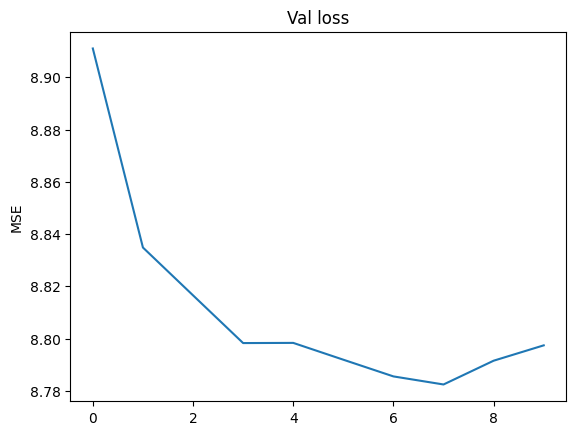

In [ ]:
train(model, optimizer, nn.MSELoss(), train_loader, test_loader)

In [ ]:
def test(model, criterion, test_loader):
    """
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        test_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    """

    y_preds = np.array([])
    sum_loss = 0
    sum_loss1 = 0
    with torch.no_grad():
        model.eval() # отключаем всё лишнее (батчнорм, дропаут и тд)
        for x_val, y_val in test_loader:
            y_pred = model(x_val)

            val_loss = criterion(y_pred, y_val)
            sum_loss += val_loss.item()
            y_preds = np.concatenate([y_preds, y_pred], axis = None)




    val_loss_value = sum_loss/len(test_loader)
    rmse_inverted_y = mean_squared_error(y_scaler.inverse_transform(model(X_test).detach().numpy().reshape(-1, 1)), y_scaler.inverse_transform(y_test), squared = False)


    # печатаем метрики
    print(f"MSE_scaled: {val_loss_value}")
    print(f"MSE: {rmse_inverted_y}")


    # predicts = y_scaler.inverse_transform(y_preds.reshape(-1, 1))

    # predicts = predicts.detach().numpy().reshape(-1, 1)

    return y_preds

In [ ]:
Y_pred = test(model, nn.MSELoss(), test_loader)

MSE_scaled: 0.6466872396128241
MSE: 8.79739215743902


In [ ]:
assert test(model, criterion, test_loader).shape[0] == y_test.shape[0]

MSE_scaled: 0.646674158121452
MSE: 8.79739215743902


(array([9.0000e+00, 1.2600e+02, 1.0380e+03, 2.9300e+03, 4.9000e+03,
        5.5450e+03, 8.0060e+03, 1.8385e+04, 1.0644e+04, 4.7000e+01]),
 array([1968.50537109, 1972.95214844, 1977.39880371, 1981.84558105,
        1986.2923584 , 1990.73901367, 1995.18579102, 1999.63256836,
        2004.0793457 , 2008.52600098, 2012.97277832]),
 <BarContainer object of 10 artists>)

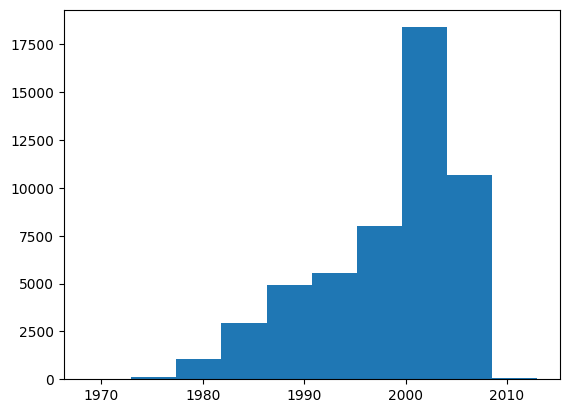

In [ ]:
plt.hist(y_scaler.inverse_transform(model(X_test).detach().numpy()))

## Задание 3. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.

In [ ]:
assert False # Дальше не идем, там в кодовых ячейках живут модели

AssertionError: ignored

Мне кажется, что я наконец-то разобрался.
Летом я делал эту домашку и смог выбить только мсе в районе 10, но сейчас первая моделька показала результат меньше 7 (!!!). Возможно я ошибся, и я в любом случае пропишу все эксперименты с нуля

### 1. Baseline ###

In [ ]:
model = nn.Sequential(
    nn.Linear(90, 45),
    nn.ReLU(),
    nn.Linear(45, 1),
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
n_epochs = 10


# MSE = 11.47536847442059
# Совсем простая модель, два линейных слоя и релу - с ней я удостоверился, что
# 1. Весь конвейер от обработки данных до подсчета метрики работает
# 2. Метрика адекватная - никто не рассчитывает на то, что такая простая модель отработает хорошо
# PS АГА КОНЕЧНО АДЕКВАТНАЯ, ЧЕЛ, У ТЕБЯ НЕЙРОСЕТЬ ПРЕДСКАЗЫВАЕТ ХУЖЕ КОНСТАНТЫ, ПОДУМАЙ О СВОЕМ ПОВЕДЕНИИ


###2. RobustScaler###

In [ ]:
# MSE = 9.608402882175174

###3. Модель здорового человека

5 эпох, N = 50000, убрал weiht_decay


In [ ]:
# 9.215568148555114

Я только сейчас понял, что weight decay занулял мои веса(((
  из-за этого прогноз был константой, и теперь я чувствую себя обезьяной, потому что я этого не понял

### 4. Учиться, учиться, учиться

5 эпох, обучение на всей выборке

In [ ]:
# 8.851416366035972

### здесь погибло много нервных клеток

### 9. Новый baseline


In [ ]:
model = nn.Sequential(
    nn.Linear(90, 180),
    nn.Dropout(0.25),
    nn.ReLU(),
    nn.Linear(180, 180),
    nn.Dropout(0.25),
    nn.ReLU(),
    nn.Linear(180, 1),
)

optimizer = torch.optim.Adam(model.parameters(), weight_decay = 0.001)
criterion = nn.MSELoss()
n_epochs = 10

9.215547373931564

### 10. Увеличил weight decay с 0.001 до 0.01, потому что модель переобучалась после небольшого количества эпох

In [ ]:
# 9.06373281354837

### 11. Добавил линейный слой

In [ ]:
model = nn.Sequential(
    nn.Linear(90, 180),
    nn.Dropout(0.25),
    nn.ReLU(),
    nn.Linear(180, 180),
    nn.Dropout(0.25),
    nn.ReLU(),
    nn.Linear(180, 180),
    nn.Dropout(0.25),
    nn.ReLU(),

    # nn.Linear(180, 180),
    # nn.Dropout(0.25),
    # nn.ReLU(),

    # nn.Linear(180, 180),
    # nn.Dropout(0.25),
    # nn.ReLU(),
    nn.Linear(180, 1),
)

optimizer = torch.optim.Adam(model.parameters(), weight_decay = 0.01)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
n_epochs = 10

# 9.06348701316372, минимум - 9.007124236762392 на 7 эпохе, надо регуляризировать

### 12. Увеличил weight decay до 0.02

In [ ]:
# 9.038400586276397

Модели не хватает глубины, добавим еще слой (я так долго могу)

### 13. Добавил линейный слой

In [ ]:
model = nn.Sequential(
    nn.Linear(90, 180),
    nn.Dropout(0.25),
    nn.ReLU(),
    nn.Linear(180, 180),
    nn.Dropout(0.25),
    nn.ReLU(),
    nn.Linear(180, 180),
    nn.Dropout(0.25),
    nn.ReLU(),
    nn.Linear(180, 180),
    nn.Dropout(0.25),
    nn.ReLU(),
    nn.Linear(180, 1),
)

optimizer = torch.optim.Adam(model.parameters(), weight_decay = 0.02)
criterion = nn.MSELoss()
n_epochs = 10

In [ ]:
9.072469086042217 - неприятно, поиграем с weight decay

### 14. Weight decay 0.01 & 0.03


In [ ]:
# 9.119812952422325 0.01
# 9.147974529694771 0.03

Фигня, оставляем 0.02, скоро будем наращивать долю дропаута

### 15. Weight decay => 0.02, dropout = 0.3

In [ ]:
# 9.106202581471

Что-то не идет у меня(

### 16. Dropout = 0.2

In [ ]:
# 9.09914600120398

### 17. Поставил по 90 нейронов в каждом слое вместо 180

In [ ]:
# 9.141701963495192

### 18. Вернул 180 нейронов и добавил линейный слой

In [ ]:
# модель снова выдает константный прогноз => сильно уменьшим weight decay

# 10.67783986509281

### 19. Увеличил wd до 0.01

In [ ]:
# 9.118140440319571

### 20. Откатился до 12 пункта: лишние линейные слои только мешают

In [ ]:
model = nn.Sequential(
    nn.Linear(90, 180),
    nn.Dropout(0.25),
    nn.ReLU(),
    nn.Linear(180, 180),
    nn.Dropout(0.25),
    nn.ReLU(),
    nn.Linear(180, 180),
    nn.Dropout(0.25),
    nn.ReLU(),
    nn.Linear(180, 1),
)

optimizer = torch.optim.Adam(model.parameters(), weight_decay = 0.02)
criterion = nn.MSELoss()
n_epochs = 10

# 9.038400586276397


### 21. Поставил StandartScaler вместо RobustScaler

In [ ]:
# 9.013876620804778
# Пришло время попробовать обучаться на всей выборке и с большим числом эпох

### 22. Вся выборка

In [ ]:
# 9.063743864441971
# пришло время рыдать((((

### 23. Weight decay 0.02 -> 0.0001, 5 эпох, 50 000

In [ ]:
# 9.180019726551416
# 8.997665712476472 на одной из эпох >>> переобучились

### 23. Weight decay 0.0001 -> 0.001, 5 эпох, 50 000

In [ ]:
# 9.089748437262184, было что-то в районе 8.99 на одной из эпох, лосс скачет

### 23. Weight decay 0.001 -> 0.01, 5 эпох, 50 000

In [ ]:
# 9.035325301452334

### 24. Отключил дропауты

In [ ]:
# 8.966759410682009 на второй эпохе, дальше переобучилась(

### 25. Больше нейронов

In [ ]:
model = nn.Sequential(
    nn.Linear(90, 500),
    nn.Dropout(0.25),
    nn.ReLU(),
    nn.Linear(500, 500),
    nn.Dropout(0.25),
    nn.ReLU(),
    nn.Linear(500, 300),
    nn.Dropout(0.25),
    nn.ReLU(),
    nn.Linear(300, 150),
    nn.Dropout(0.25),
    nn.ReLU(),
    nn.Linear(150, 1),
)

optimizer = torch.optim.Adam(model.parameters(), weight_decay = 0.02)
criterion = nn.MSELoss()
n_epochs = 10

# 9.03783230299843


### 26. Меньше нейронов

In [ ]:
model = nn.Sequential(
    nn.Linear(90, 90),
    nn.Dropout(0.25),
    nn.ReLU(),
    nn.Linear(90, 60),
    nn.Dropout(0.25),
    nn.ReLU(),
    nn.Linear(60, 30),
    nn.Dropout(0.25),
    nn.ReLU(),
    nn.Linear(30, 1),
)

optimizer = torch.optim.Adam(model.parameters(), weight_decay = 0)
criterion = nn.MSELoss()
n_epochs = 10

In [ ]:
# 8.810942149736528

### 27. Чуть меньше нейронов

In [ ]:
model = nn.Sequential(
    nn.Linear(90, 75),
    nn.Dropout(0.25),
    # nn.ReLU(),
    nn.LeakyReLU(),
    nn.Linear(75, 50),
    nn.Dropout(0.25),
    nn.LeakyReLU(),
    # nn.ReLU(),
    nn.Linear(50, 25),
    nn.Dropout(0.25),
    # nn.ReLU(),
    nn.LeakyReLU(),
    nn.Linear(25, 1),
)

optimizer = torch.optim.Adam(model.parameters(), weight_decay = 0)
criterion = nn.MSELoss()
n_epochs = 10

# 8.893557008918913

### 28. Пробил 8.80, заменив ReLU на LeakyReLU

In [ ]:
# Epoch: 1, loss: 8.906213182656998

# Epoch: 2, loss: 8.851895893148352

# Epoch: 3, loss: 8.786735777327344

# Epoch: 4, loss: 8.804129865891225

# Epoch: 5, loss: 8.794710934326169

# Epoch: 6, loss: 8.784075078057132

# Epoch: 7, loss: 8.908369529405386

# Epoch: 8, loss: 8.873641781599096

# Epoch: 9, loss: 8.827222595184526

# Epoch: 10, loss: 8.936281402927328

# Переобучается(

### 29. Убрал первый линейный слой

In [ ]:
# Лосс опять прыгает, поработаем с оптимизатором

### 30. Заменил Adam на Adagrad

In [ ]:
# Лосс наконец-то начал падать непрерывно и перестал прыгать!!!
# 8.83270710799083

### 31. Вернул первый линейный слой

In [ ]:
# Epoch: 1, loss: 8.924800089241128

# Epoch: 2, loss: 8.857135357963555

# Epoch: 3, loss: 8.834129786093328

# Epoch: 4, loss: 8.815502067303274

# Epoch: 5, loss: 8.822622655935385

# Epoch: 6, loss: 8.805021259007898

# Epoch: 7, loss: 8.818988671085586

# Epoch: 8, loss: 8.812170360331644

# Epoch: 9, loss: 8.799152072321807

# Epoch: 10, loss: 8.818703033870054

# Снова пробили 8.80 и снова отскочили, модель снова колбасится ближе к 10 эпохе

### 32. Поменял количество нейронов, убрал weight decay и все лишние приблуды

In [ ]:
model = nn.Sequential(
    nn.Linear(90, 75),
    nn.Dropout(0.25),
    nn.LeakyReLU(),
    nn.Linear(75, 50),
    nn.Dropout(0.25),
    nn.LeakyReLU(),
    nn.Linear(50, 25),
    nn.Dropout(0.25),
    nn.LeakyReLU(),
    nn.Linear(25, 1),
)

optimizer = torch.optim.Adagrad(model.parameters())
criterion = nn.MSELoss()
n_epochs = 10


In [ ]:
# 8.809540038219245

### 33. Dropout 0.25 -> 0.2

In [ ]:
# 8.802280536275358

### 34. Добавил больше нейронов в последний слой


In [ ]:
model = nn.Sequential(
    nn.Linear(90, 75),
    nn.Dropout(0.2),
    nn.LeakyReLU(),
    nn.Linear(75, 50),
    nn.Dropout(0.2),
    nn.LeakyReLU(),
    nn.Linear(50, 35),
    nn.Dropout(0.2),
    nn.LeakyReLU(),
    nn.Linear(35, 1),
)

optimizer = torch.optim.Adagrad(model.parameters())
criterion = nn.MSELoss()
n_epochs = 10

In [ ]:
Epoch: 1, loss: 8.921700464959715

Epoch: 2, loss: 8.868008832943518

Epoch: 3, loss: 8.818563884320342

Epoch: 4, loss: 8.8177022119868

Epoch: 5, loss: 8.800630106293946

Epoch: 6, loss: 8.792228055111742

Epoch: 7, loss: 8.79218158354848

Epoch: 8, loss: 8.784850518966337

Epoch: 9, loss: 8.784046143685606

Epoch: 10, loss: 8.788227601171723

In [ ]:
Epoch: 1, loss: 8.91103262388804

Epoch: 2, loss: 8.83484153112309

Epoch: 3, loss: 8.816538275792189

Epoch: 4, loss: 8.798264921022724

Epoch: 5, loss: 8.798332079232118

Epoch: 6, loss: 8.791899045376239

Epoch: 7, loss: 8.785501027085456

Epoch: 8, loss: 8.7824135538777

Epoch: 9, loss: 8.791514519021687

Epoch: 10, loss: 8.79739215743902

Ура, я наконец-то допил свой чай с печеньками

Эта модель - мой собственный state of the art. Ее емкость можно увеличить, поскольку на графике мы видим, что большинство старых фильмов она интерпретирует как новые. Впрочем, это даст только незначительное снижение ошибки, поскольку таких фильмов мало

В моей итоговой модели 4 слоя нейронов:

90 -> 75 -> 50 -> 35 -> 1

Почему именно так?
Честно - понятия не имею, другие конфигурации работали хуже, а шаг с увеличением размера предпоследнего слоя - это вообще что-то странное. Я выявил для себя следующие выводы:

1. Много слоев - зло
2. ReLU может уступать по качеству другим нелинейностям, подбирать стоит при помощи перебора
3. Дропаут реально мешает переобучению
4. Надо обращать внимание на оптимайзер
5. И на масштабирование

И еще много выводов. На эту домашку я потратил уйму времени, мб даже больше, чем на любую домашку в своей жизни